**Checking File Integrety**

You download a piece of software. How do you know that is hasn't been corrupted in the downloading process. 

If you hash the file you receive you can match it to what was obtained when the file was hashed at the source.

It should be extremely unlikely to have a corrupted version of the file produce the correct hash. The probability of a 256 bit hash match by chance alone should be around $1/2^{256}$

In the following example, we hash a large byte string, and sequentially modify the string one byte at a time, hash it and print out the digest.

We determine how many bits of the hash give a match to the original one.

**Notes**

**bitwise and**

In Python, if m and n are ints, m&n gives the result of **bitwise and operation** e.g.

In [47]:
m=21
n=23
print(bin(m))
print(bin(n))
print(bin(m&n))

0b10101
0b10111
0b10101


**bitwise right shift**

n>>p shifts the bits of an int n by p positions to the right.

In [60]:
print(bin(21))
print(bin(21>>1))
print(bin(21>>2))
print(bin(21>>3))
print(bin(21>>4))
print(bin(21>>5))

0b10101
0b1010
0b101
0b10
0b1
0b0


**bitwise left shift**

n<<p shifts the bits of an int n by p positions to the left.

In [63]:
print(bin(1))
print(bin(1<<1))
print(bin(1<<2))
print(bin(1<<3))
print(bin(1<<4))
print(bin(1<<5))

0b1
0b10
0b100
0b1000
0b10000
0b100000


**Count number of common bits in a pair of bytes**

In [187]:
import pandas as pd
import numpy as np
def ncommon_bits_in_pair_of_bytes(b1,b2):
    s=0
    p=b1^b2
    t=1
    for j in range(8):
        nbits=(p&t)>>j
        t=t<<1
        s+=nbits
    return(s)

**Count number of common bits in a 32 byte (256 bits) string**

In [191]:
def ncommon_bits(bs1,bs2):
    s=0
    for i in range(32):
        m=bs1[i]
        n=bs2[i]
        s+=ncommon_bits_in_pair_of_bytes(m,n)
    return(s)

In [194]:
import pandas as pd
#
# modify a collection of random bytes of a string and determine how many bits of the resulting hash match
#
ntrials=10000
res=[]
for i in range(ntrials):
    loc=np.random.choice(len(bs))
    oldchar=bs[loc]
    # find a new char to replace this one
    while True:
        newchar=np.random.choice(range(256))
        if newchar!=oldchar:
            break
    bs[loc]=newchar
    m=hashlib.sha256()
    m.update(bs)
    d1=m.digest()
    ncommon=ncommon_bits(d0,d1)
    res.append(ncommon)

127.8924
7.939453742706322


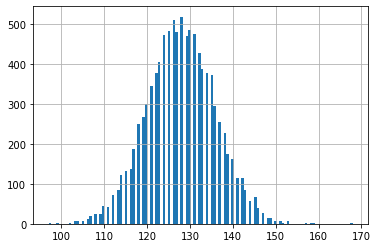

In [195]:
pd.Series(res).hist(bins=120)
print(pd.Series(res).mean())
print(pd.Series(res).std())

This should be compared with the distribution of the number of successes in 256 Bernoulli trials where the success probability is 1/2. The distribution should be roughly normal with a mean of 128
and standard deviation 
$$
\sqrt{{\frac{1}{2}\left(1- \frac{1}{2}\right)\over 256}} = 8.
$$

**The Nonce Problem**

Below, we'll see how bitcoin works (special case of block chain) with one of the aspects of this being that "miners" try to add to strings something called a "nonce" to get their hashes to look a certain way. This is meant to be a hard problem because we want to ensure that multiple miners tend not to find solutions at the same time.

So imagine you have to add some bytes to a string to get the hash to have some special properties - say make the first ten hexadecimal digits be zero. How hard is this problem?

To understand the complexity of the problem, assuming the digest were truly random, the bytes of a digest would behave like iid random bytes with all $2^8=256$ possibilities for each 8-bit byte beinq equally likely.

Assuming we can't use the structure of the hash function in any meaningful way, we only have the brute force of random guessing approach at our disposal.

If we start with a byte array add a random byte array to it, until we get some pre-determined number of zeros in its hash, on average how many trials should it take?

In [1]:
import hashlib
import numpy as np

initial_string=b"my starting string"
m= hashlib.sha256()
m.update(initial_string)
d=m.digest()

nzeros=2
print(16**nzeros)
st="".join(["0" for i in range(nzeros)])

ntrials=1
nsteps=[]
for trial in range(ntrials):
    steps=0
    while True:
        steps+=1
        initial_string=b"my starting string"
        m=hashlib.sha256()
        nonce=bytearray(initial_string)
        for i in range(25):
            c= chr(np.random.choice(range(256))).encode()
            nonce+=c
        m.update(initial_string+nonce)
        if m.digest().hex()[0:nzeros]==st:
            #print(ctr)
            break
    #print(steps)
    nsteps.append(steps)
np.mean(np.array(nsteps))

256


102.0

In [53]:
m.digest()

b'\x0e\x9c,\x1b\xf0i\xb8\x1ei\x07\xa4\xc9\xdd\xf2\x01QR\x7f"\x8f\xf7O\xfas\xea\x10\xf9V\xd94n\xf6'

**Blockchain**

Here is a link to a nice overview of blockchain

https://blog.goodaudience.com/blockchain-for-beginners-what-is-blockchain-519db8c6677a?gi=c7ca387cf33a

In blockchain, a new block in the chain is constructed using 

1) new transaction data
2) a hash of the previous block
3) an extra string, referrred to as a nonce, which is found by a miner

Bitcoin mining is nicely described here.

https://www.buybitcoinworldwide.com/mining/#what-is-bitcoin-mining

Very simply put, a miner's job is to find a nonce so that the hash of the concatenation of the above satisfies certain properties. Miners compete to find one. The task of finding a nonce is meant to be complex and takes minutes to complete with considerable computational power. Importantly, it would be highly unlikely for two *solutions* to be found at around the same time, so collisions are avoided.

Miners are rewarded for their efforts with bitcoins.

Once a miner is successful, the information is shared with the community and when suffucient agreement is reached that the nonce works, the new block is added to the chain, and the hash of that new block is available to add to the next chain.

The series of blocks is made available to everyone in the community, so the entire history of all transactions is available to everyone. Anyone in the community can check the series of blocks to ensure that its integrity has been maintained.

**Password Protection**

Here is a link to a nice explanation of password file attacks and password file protection:

https://crackstation.net/hashing-security.htm

When you log in to an account, the password you type can be checked against a password file. 

Maintaining a password file as a plain text file is a security risk. If somebody gets a hold of that file, they can steal everyone's password on the system. If they had knowledge of a particular user and their password, and if that user uses the same password on some other systems (e.g. a bank account) this could have serious repurcusions.

Instead, plain text passwords are never stored, rather, the hashes of the passwords can be stored. When the user enters a password, the hash of that password entered is compared with the hashed correct password, and if it matches the user is allowed in.

This method can also be weak. If some user happens to pick as a password, a dictionary word, or a word with a small number of characters, the attacker can try entering the hash of every possibility and break-in.

To protect against this possibility, a system can attach an additional _random_ string  called a _salt_ to the password and store that on the system together with the hashed salted password. It would be impractical for an attacker to try every possible salt with every possible word on one of the lists above. 

**A Little Bit on Asymmetric Cryptography**

Since many of the applications of cryptographic hash functions use asymmetric cryptyography, we review this briefly.

Asymmetric crytography is based on public and private keys. Putting aside the technical details, the basic idea is this. You have a private key that you don't share with others, and a public key that you do share. The public key can be used to encrypt a file which only the private key can decrypt. 

If I want to send a message to you, I need your public key. I use your public key to encrypt the message, and since you are the only one holding your  private key, only you can decrypt it. 

So we are talking about a pair of functions that can be applied to a message:

> pr(message) = a function only available to you

> pu(message) = a function you are willing to share with others

such that 

> pu(pr(message))=message 

or perhaps 

> pr(pu(message))=message 

depending on the application.

If you want to send a message to me, you need my public key. You use that to encrypt the message and then only I can decrypt it with my private key.

One model (RSA) for this is that you, the holder of a private key, pick a number pq that is a product of two prime numbers p and q. To encrypt using your public key only requires knowledge of pq, and the descryption algorithm requires knowledge of p and q. Thus, unless an attacker has an efficient way of factoring large numbers, encrypted messages are safe from decryption.

It is also possible to do things in reverse. I can maintain a private key that can only encrypt a message and provide a public key to others that can decrypt.

**E-Signed Documents**

Documents can be electronically signed, with the purpose of memorializing that 

> a) a signer actually signed the document, 

and 

> b) the document that is supposed to have been signed wasn't modified.
 
To electronically sign a document, assuming I have a private key and the individual receiving the document has my public key I can proceed as follows. 

> 1) hash the original document O to produce a digest D, i.e. D=h(O) 
then

> 2) encrypt the digest with my private key i.e. E=pr(D)

> 3) bundle the orginal document, the encrypted digest, and my public key (O,E,pu)

> 4) send the bundle to the receiver

With the received document, the receiver

> 1) decodes the encrypted digest using my public key so they now have O and D

> 2) hashes the original document to get D'=h(O)

> 3) checks agreement between calculated D' hash and the sent hash D.

Importantly, for someone to forge my signature on a document, they would need to have my private key.





